In [1]:
from __future__ import division
import numpy as np
from numpy import linalg as LA
#np.seterr(divide='ignore') # these warnings are usually harmless for this code
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import os
import scipy.stats as stats
import pyhsmm
from pyhsmm.util.text import progprint_xrange
import pyhsmm.basic.distributions as distributions
import scipy.io as sio
import csv
import copy
import time
import pickle 
from sklearn import preprocessing

In [2]:
# to do : load posterior models with 3 devices in it. posteriormodel is a dic
#created 3/22 by WQY
filename = 'posterior_models_with_3_devices.sav'
posteriormodel_dic = pickle.load(open(filename, 'rb'))
print(posteriormodel_dic)
posteriormodel = posteriormodel_dic[13105]
filename = 'data_devices_dic_array.sav'
data_devices = pickle.load(open(filename, 'rb'))
data = data_devices[13105]
#print(data)
data_scaled = preprocessing.scale(data)

{13105: <pyhsmm.models.WeakLimitStickyHDPHMM object at 0x7fc2f096c860>, 13101: <pyhsmm.models.WeakLimitStickyHDPHMM object at 0x7fc2f04765f8>, 13103: <pyhsmm.models.WeakLimitStickyHDPHMM object at 0x7fc2f04159b0>}


(155461, 2)


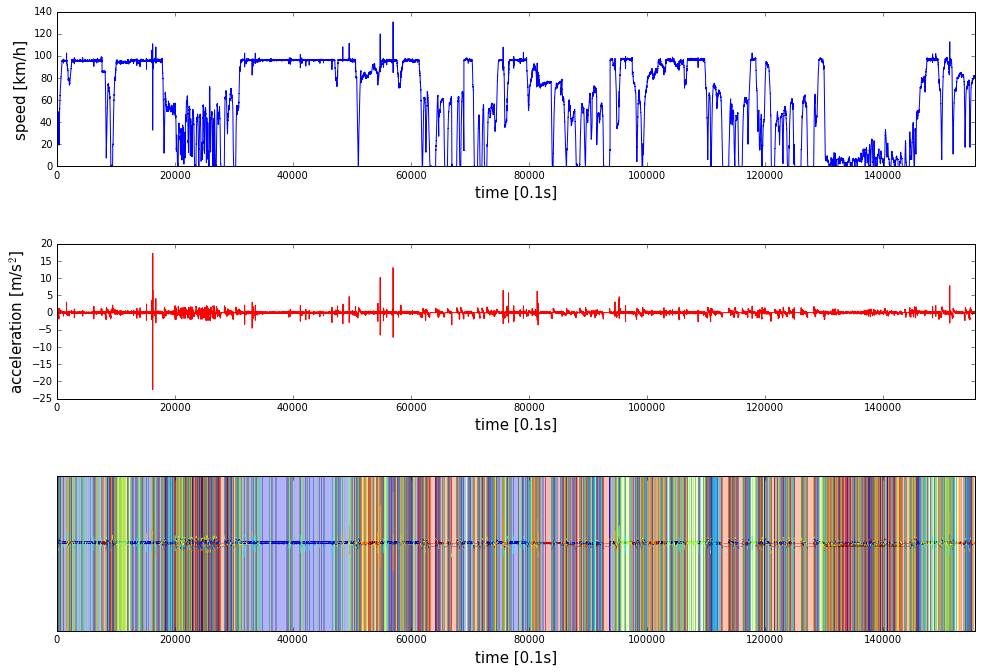

In [6]:
#plot data and sate sequence
fig1 = plt.figure(figsize = (15,10))
fig1.subplots_adjust(bottom = 0.1)
fig1.subplots_adjust(top = 0.96)
fig1.subplots_adjust(right = 0.98)
fig1.subplots_adjust(left = 0.13)
fig1.subplots_adjust(wspace = 0.4)
fig1.subplots_adjust(hspace = 0.5)

ax0 = fig1.add_subplot(3,1,1)
ax0.plot(np.arange(data.shape[0]),data[:,0],'-',color = 'b',linewidth = 1)
ax0.set_xlabel('time [0.1s]', fontsize=15)
ax0.set_ylabel('speed [km/h]', fontsize=15)
ax0.set_xlim([0, data.shape[0]])
ax1 = fig1.add_subplot(3,1,2)
ax1.plot(np.arange(data.shape[0]),data[:,1],'-',color = 'r',linewidth = 1)
ax1.set_xlabel('time [0.1s]', fontsize=15)
ax1.set_ylabel('acceleration [m/s$^{2}$]', fontsize=15)
ax1.set_xlim([0, data.shape[0]])

ax2 = fig1.add_subplot(3,1,3)
state_list = posteriormodel.states_list
posteriormodel.plot_stateseq(state_list[0])
#plt.xlim(data.shape[1]*0.1,data.shape[0]*0.1) 
#ax2.set_xticklabels(np.arange(data.shape[0]))
ax2.set_xlabel('time [0.1s]', fontsize=15)

plt.savefig("state_Sequence_for_Device13105.png",dpi = 1200)
print(data.shape)

(155461, 2)


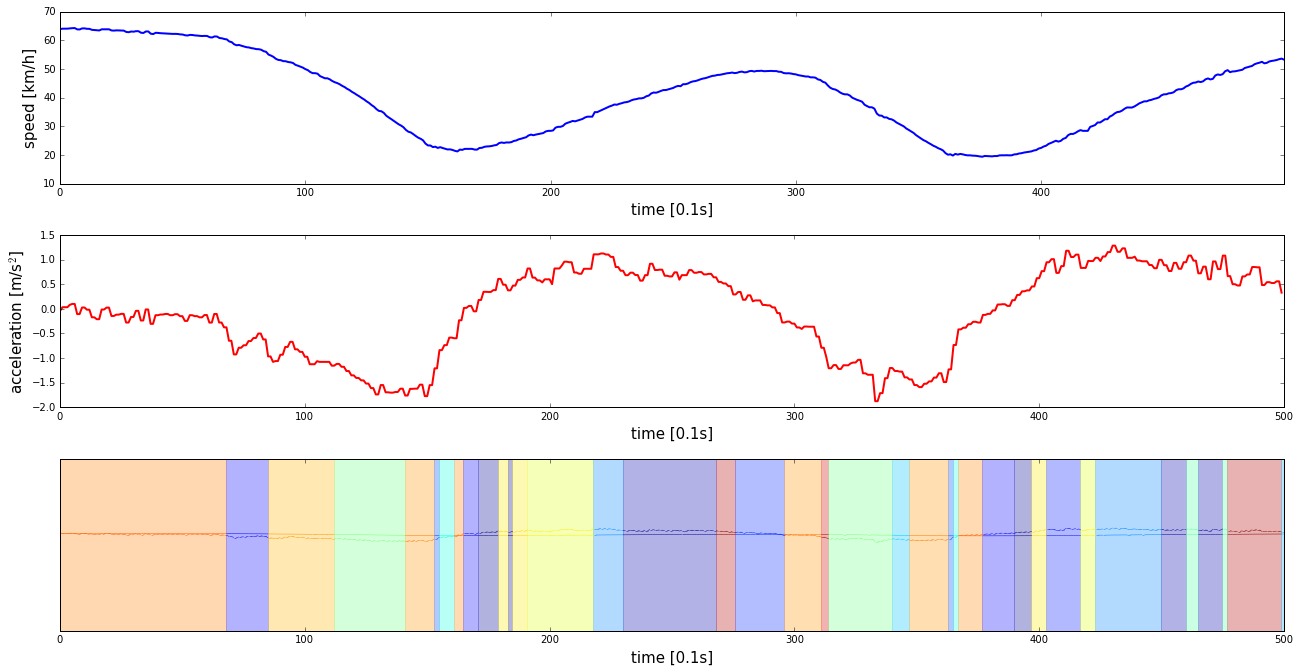

In [7]:
#plot data and sate sequence
segment_length = 500
fig1 = plt.figure(figsize = (20,10))
fig1.subplots_adjust(bottom = 0.1)
fig1.subplots_adjust(top = 0.96)
fig1.subplots_adjust(right = 0.98)
fig1.subplots_adjust(left = 0.13)
fig1.subplots_adjust(wspace = 0.4)
fig1.subplots_adjust(hspace = 0.3)

ax0 = fig1.add_subplot(3,1,1)
ax0.plot(np.arange(segment_length),data[0:segment_length,0],'-',color = 'b',linewidth = 2)
ax0.set_xlabel('time [0.1s]', fontsize=15)
ax0.set_ylabel('speed [km/h]', fontsize=15)
ax0.set_xlim([0, segment_length-1])
ax1 = fig1.add_subplot(3,1,2)
ax1.plot(np.arange(segment_length),data[0:segment_length,1],'-',color = 'r',linewidth = 2)
ax1.set_xlabel('time [0.1s]', fontsize=15)
ax1.set_ylabel('acceleration [m/s$^{2}$]', fontsize=15)
ax1.set_xlim([0, segment_length])

ax2 = fig1.add_subplot(3,1,3)
state_list = posteriormodel.states_list
posteriormodel.plot_stateseq(state_list[0])
ax2.set_xlim([0, segment_length])
#plt.xlim(data.shape[1]*0.1,data.shape[0]*0.1) 
#ax2.set_xticklabels(np.arange(data.shape[0]))
ax2.set_xlabel('time [0.1s]', fontsize=15)

plt.savefig("state_Sequence_for_Device13105_segment.png",dpi = 1200)
print(data.shape)

117
177
16
183
182
47
142
161
46
150
46
150
132
107
8
72


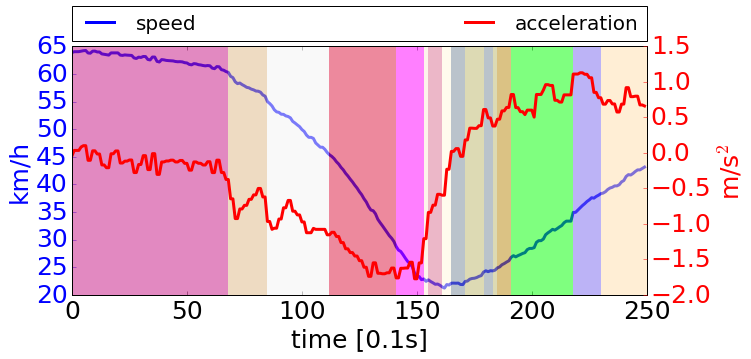

In [4]:
matplotlib.rcParams.update({'font.size': 25})
import matplotlib.colors as colors
cols = []
for col in colors.cnames:
    cols.append(col)
cumulated_dur_list = cumulated_dur.tolist()    
segment_length = 250
start = 0
end = start + segment_length
t = np.arange(start, end, 1)


fig1 = plt.figure(figsize = (11,13.5))

ax1 = fig1.add_subplot(3,1,2)

ln1 = ax1.plot(t,data[0:segment_length,0],'-',color = 'b',linewidth = 3, label='speed')
ax1.set_xlabel('time [0.1s]', fontsize=25)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('km/h', color='b', fontsize=25)
ax1.tick_params('y', colors='b')
#ax1.legend('speed',fontsize=20)  
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
ax2 = ax1.twinx()
ln2 = ax2.plot(t,data[0:segment_length,1],'-',color = 'r',linewidth = 3, label='acceleration')
ax2.set_ylabel('m/s$^{2}$', color='r', fontsize=25)
ax2.tick_params('y', colors='r')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.) 
index = 0
sta_log = []
sta_col = {}
ind = 0
for dur in cumulated_dur_list:
    print(stateseqs[0][dur])
    if stateseqs[0][dur] not in sta_log:
        sta_log.append(stateseqs[0][dur])
        sta_col[stateseqs[0][dur]] = cols[ind]
        ind = ind + 1
    if dur < segment_length:
        if index == 0:
            ax2.axvspan(0, dur, facecolor=sta_col[stateseqs[0][dur]], alpha=0.5,edgecolor='None')
            index = index+1
        else:
            ax2.axvspan(cumulated_dur_list[index-1], dur, facecolor=sta_col[stateseqs[0][dur]], alpha=0.5,edgecolor='None')
            index = index+1
    if dur >= segment_length:
        ax2.axvspan(cumulated_dur_list[index-1], segment_length, facecolor=sta_col[stateseqs[0][dur]], alpha=0.5,edgecolor='None')
        break

#ax1.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)              
#ax2.axvspan(200, 400, facecolor='#2ca02c', alpha=0.5)
# added these three lines
lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs,bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=20)
fig1.tight_layout()
plt.savefig("state_Sequence_for_Device13105_in_one_figure.png",dpi = 1200)

In [3]:
stateseqs = posteriormodel.stateseqs
durations = posteriormodel.durations
print('plot the statistical results for car scenario primitives')
print('stateseqs = \n',stateseqs)
print('stateseqs_num = \n',stateseqs[0].shape)
print('durations = \n',durations)
scenario_num = np.unique(posteriormodel.stateseqs[0])
print('scenario_num = \n',scenario_num)
print('scenarios_total = \n',len(scenario_num))
scenario_num_axis = len(scenario_num)
scenario_statis = np.zeros((scenario_num_axis,1))
cumulated_dur = np.cumsum(durations)
print('cumulated_dur = \n',cumulated_dur)
duration_state_val = np.zeros((len(cumulated_dur)))
for i in range(len(cumulated_dur)):
    duration_state_val[i] = stateseqs[0][cumulated_dur[i]-1]#each duration correspond pattern No.
print('duration_state_val = \n',duration_state_val)

data_pattern = {}

for j in range(scenario_num_axis):
    data_pattern[scenario_num[j]]=data[np.where(stateseqs[0] == scenario_num[j])]
    #print('num_pattern = \n',num_pattern[0])
    #scenario_statis[j] = len(num_pattern[scenario_num[j]]) #frequecy of each states
print('scenario_statis = \n',scenario_statis)

plot the statistical results for car scenario primitives
stateseqs = 
 [array([73, 73, 73, ..., 36, 36, 36], dtype=int32)]
stateseqs_num = 
 (155461,)
durations = 
 [array([ 68,  17,  27, ...,  12, 130, 147])]
scenario_num = 
 [  2   4   6   8  11  13  16  19  22  23  26  27  32  34  35  36  43  46
  47  48  52  55  60  69  71  72  73  75  78  79  82  84  90  91  93  97
  98 104 107 109 113 114 115 116 117 119 121 129 132 133 135 137 141 142
 143 146 147 148 150 157 158 159 161 162 166 167 170 174 177 178 181 182
 183 186 188 189 198]
scenarios_total = 
 77
cumulated_dur = 
 [    68     85    112 ... 155184 155314 155461]
duration_state_val = 
 [ 73. 117. 177. ... 137.  71.  36.]
scenario_statis = 
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

In [ ]:
#plot data and sate sequence
fig1 = plt.figure(figsize = (20,8))
fig1.subplots_adjust(bottom = 0.1)
fig1.subplots_adjust(top = 0.96)
fig1.subplots_adjust(right = 0.98)
fig1.subplots_adjust(left = 0.13)
fig1.subplots_adjust(wspace = 0.4)
fig1.subplots_adjust(hspace = 0.3)

ax0 = fig1.add_subplot(6,1,1)
ax0.plot(np.arange(data[0:500,0].shape[0])*0.1,data[0:500,0],'-',color = 'b',linewidth = 1)
ax0.set_xlabel('time [s]')
ax0.set_ylabel('speed [km/h]')

ax1 = fig1.add_subplot(6,1,2)
ax1.plot(np.arange(data[0:500,0].shape[0])*0.1,data[0:500,1],'-',color = 'r',linewidth = 1)
ax1.set_xlabel('time [s]')
ax1.set_ylabel('acceleration [m/s^2]')

ax2 = fig1.add_subplot(6,1,3)
state_list = posteriormodel.states_list
posteriormodel.plot_stateseq(state_list[0])
#plt.xlim(data.shape[1]*0.1,data.shape[0]*0.1) 
#ax2.set_xticklabels(np.arange(data.shape[0]))
ax2.set_xlabel('time [s]')
print(data.shape)